In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten #flatten using for 28x28 to 1x784.

In [ ]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

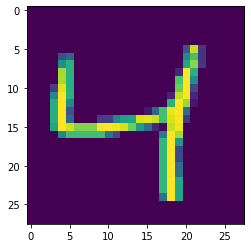

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [ ]:
X_train=X_train/255 #for put all pixel value in 0 to 1. so we may get perfect wegihts.
X_test=X_test/255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
model=Sequential()
model.add(Flatten(input_shape=(28,28))) #1x784
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax')) #multiclassifier

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 32)                4128      
                                                                 
 dense_10 (Dense)            (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy']) #sparse i have to use one_hot encoding in categorical Crossentropy we have use one hot encoding


In [ ]:
history=model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2807 - accuracy: 0.9184 - val_loss: 0.1421 - val_accuracy: 0.9592
Epoch 2/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1184 - accuracy: 0.9643 - val_loss: 0.1064 - val_accuracy: 0.9682
Epoch 3/25
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0807 - accuracy: 0.9757 - val_loss: 0.1154 - val_accuracy: 0.9657
Epoch 4/25
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0608 - accuracy: 0.9819 - val_loss: 0.1111 - val_accuracy: 0.9688
Epoch 5/25
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0473 - accuracy: 0.9852 - val_loss: 0.0912 - val_accuracy: 0.9744
Epoch 6/25
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0390 - accuracy: 0.9876 - val_loss: 0.0937 - val_accuracy: 0.9738
Epoch 7/25
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0307 - accuracy: 0.9905 - val_loss: 0.1165 - val_accur

In [ ]:
y_prob=model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
y_prob

array([[6.11046921e-18, 9.76826982e-17, 1.20423826e-13, ...,
        9.99999940e-01, 1.32782096e-14, 1.01633160e-10],
       [4.00071755e-24, 3.75129818e-14, 9.99999940e-01, ...,
        5.36553911e-29, 1.32460682e-24, 7.76512283e-34],
       [1.59342928e-10, 9.99974072e-01, 2.21264308e-05, ...,
        1.02524984e-06, 1.31066440e-06, 2.07815900e-11],
       ...,
       [1.57374848e-23, 7.68139686e-18, 3.08900475e-16, ...,
        1.12880885e-10, 2.09172425e-20, 1.57209093e-10],
       [6.79896621e-23, 3.06612838e-28, 1.08438378e-24, ...,
        9.24323948e-22, 3.51142856e-12, 7.80796134e-25],
       [2.47017974e-19, 2.28018557e-30, 1.12861153e-20, ...,
        0.00000000e+00, 1.74571541e-20, 2.02679956e-32]], dtype=float32)

In [ ]:
y_pred=y_prob.argmax(axis=1)#maximum probability resepted values of 0 to 9

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.9777

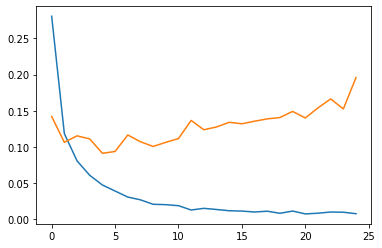

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

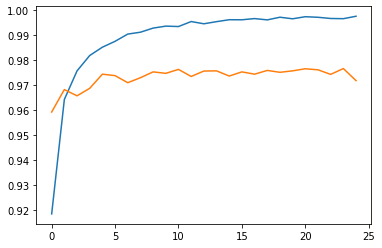

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

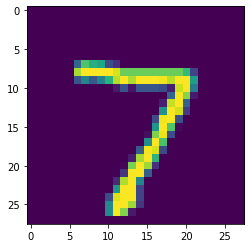

In [ ]:
plt.imshow(X_test[0])

In [ ]:
pred=model.predict(X_test[0].reshape(1,28,28))

1/1 [==============================] - 0s 32ms/step


In [ ]:
pred.argmax(axis=1)

array([7])